# Modèle de reconnaissance d'empreintes

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras import layers
from random import shuffle

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [11]:
# |---------------------------------------------|
# |          Configuration du modèle            |
# |---------------------------------------------|

batch_size = 32
epochs = 60

In [12]:
# Construire le dataset à partir du folder 

image_size = (256, 256)

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/home/shared/Dataset_wildlens",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 508 files belonging to 2 classes.
Using 407 files for training.
Using 101 files for validation.


In [13]:
# Voir les 9 premières images

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(np.array(images[i]).astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [14]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.4),
    layers.RandomFlip("vertical")
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(np.array(augmented_images[0]).astype("uint8"))
#         plt.axis("off")


In [15]:
binary_model = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Normalization(mean=[0.485, 0.456, 0.406], variance=[0.229, 0.224, 0.225], axis=-1),
    layers.Conv2D(32, kernel_size=5, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')  # Sortie binaire
])


In [16]:
binary_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [17]:
binary_model.build()
binary_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist=binary_model.fit(
   train_ds,
   epochs=epochs,
   batch_size=batch_size,
   validation_data=val_ds
)

Epoch 1/60


InaccessibleTensorError: <tf.Tensor 'sequential_1_1/normalization_1/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'sequential_1_1/normalization_1/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> was defined here:
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/asyncio/events.py", line 84, in _run
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    File "/tmp/ipykernel_3011925/598916342.py", line 1, in <module>
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/models/sequential.py", line 227, in call
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py", line 43, in __call__
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/layer.py", line 826, in __call__
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/layer.py", line 1365, in _maybe_build
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py", line 193, in build
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 4728, in reshape
    File "/home/martin/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 1851, in reshape

The tensor <tf.Tensor 'sequential_1_1/normalization_1/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> cannot be accessed from FuncGraph(name=one_step_on_iterator, id=128192988855488), because it was defined in FuncGraph(name=one_step_on_data, id=128192988858944), which is out of scope.

In [439]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

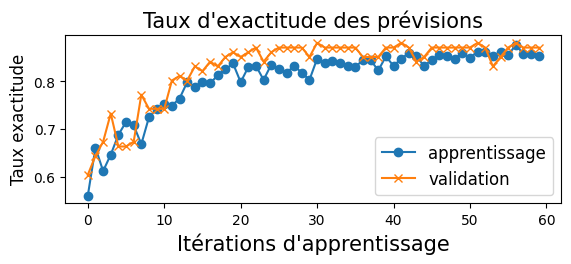

In [440]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'],'o-')
plt.plot(hist.history['val_accuracy'],'x-')
plt.title("Taux d'exactitude des prévisions",fontsize=15)
plt.ylabel('Taux exactitude',fontsize=12)
plt.xlabel("Itérations d'apprentissage",fontsize=15)
plt.legend(['apprentissage', 'validation'], loc='lower right',fontsize=12)

In [441]:
binary_model.predict

<bound method TensorFlowTrainer.predict of <Sequential name=sequential_61, built=True>>

Faire :
- Un rollback + save best histoire de sauvegarder la meilleure version du modèle
- Un predict + matrice de confusion
